In [1]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
academic = pd.read_csv('CSV/academic.csv')
advising = pd.read_csv('CSV/advising.csv')
atis = pd.read_csv('CSV/atis.csv')
geo = pd.read_csv('CSV/geo.csv')
imdb = pd.read_csv('CSV/imdb.csv')
restaurants = pd.read_csv('CSV/restaurants.csv')
scholar = pd.read_csv('CSV/scholar.csv')
spider = pd.read_csv('CSV/spider.csv')
wikisql = pd.read_csv('CSV/wikisql.csv')
yelp = pd.read_csv('CSV/yelp.csv')
medical = pd.read_csv("CSV/data_medical.csv")
df_tsv = pd.read_csv("CSV/all_questions.csv")
cosql = pd.read_csv("CSV/cosql.csv")

data_list = [academic, advising, atis, geo, imdb, restaurants, scholar, spider, wikisql, yelp, medical, df_tsv]
 
names = ['academic', 'advising', 'atis', 'geo', 'imdb', 'restaurants', 'scholar', 'spider', 'wikisql', 'yelp', 'medical' ,
        'train_spider', 'test_spider', 'train_others', 'train_sparc','test_spark', 'cosql_all']

In [3]:
def description(data, words, names):
    for word in words:
          data[word] = data.sql.str.count(word)
    data_info = pd.DataFrame()
    result = pd.DataFrame()
    sql = data['sql'].str.upper().str.split()
    question = data['question'].str.upper().str.split()
    data['sqlSplit'] = sql
    data['questionSplit'] = question
    data['questionUniqueCounter'] = question.apply(set).apply(len)
    data['sqlUniqueCounter'] = sql.apply(set).apply(len)
    for name in names:
        data_new = data[data['source'] == name]
              
        data_info['mean_len_sql'] = [data_new['sqlUniqueCounter'].mean()]
        data_info['median_len_sql'] = [data_new['sqlUniqueCounter'].median()]
        data_info['std_len_sql'] = [data_new['sqlUniqueCounter'].std()]    
        data_info['mean_len_question'] = [data_new['questionUniqueCounter'].mean()]
        data_info['median_len_question'] = [data_new['questionUniqueCounter'].median()]
        data_info['std_len_question'] = [data_new['questionUniqueCounter'].std()]
        data_info['source'] = name
        result = pd.concat([result,data_info], axis=0, join='outer', ignore_index=False)
    
    return result

In [4]:
medical.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
def number_of_keyWords(data,words,names):
    data_keywords = pd.DataFrame()
    result = pd.DataFrame()
    for name in names:
        filtered_by_source = data[data['source'] == name]
        for word in words:
            data_keywords[word] = [filtered_by_source[word].sum()]
        data_keywords['source'] = name
        result = pd.concat([result,data_keywords], axis=0, join='outer', ignore_index=False)
    return result

In [17]:
words = ['SELECT','WHERE','FROM','JOIN', 'HAVING','LIKE','GROUP BY','COUNT','DISTINCT','MIN','MAX','AVG','ORDER BY', 'DATE']

In [18]:
final_df = pd.concat([academic, advising, atis, geo, imdb, restaurants, scholar, spider, wikisql, yelp, medical, df_tsv], axis=0, join='outer', ignore_index=False)

In [19]:
final_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [20]:
final_df = final_df.drop_duplicates(subset=['question'])

In [21]:
description_df = description(final_df, words, names)

In [22]:
data_keywords = number_of_keyWords(final_df, words, names)

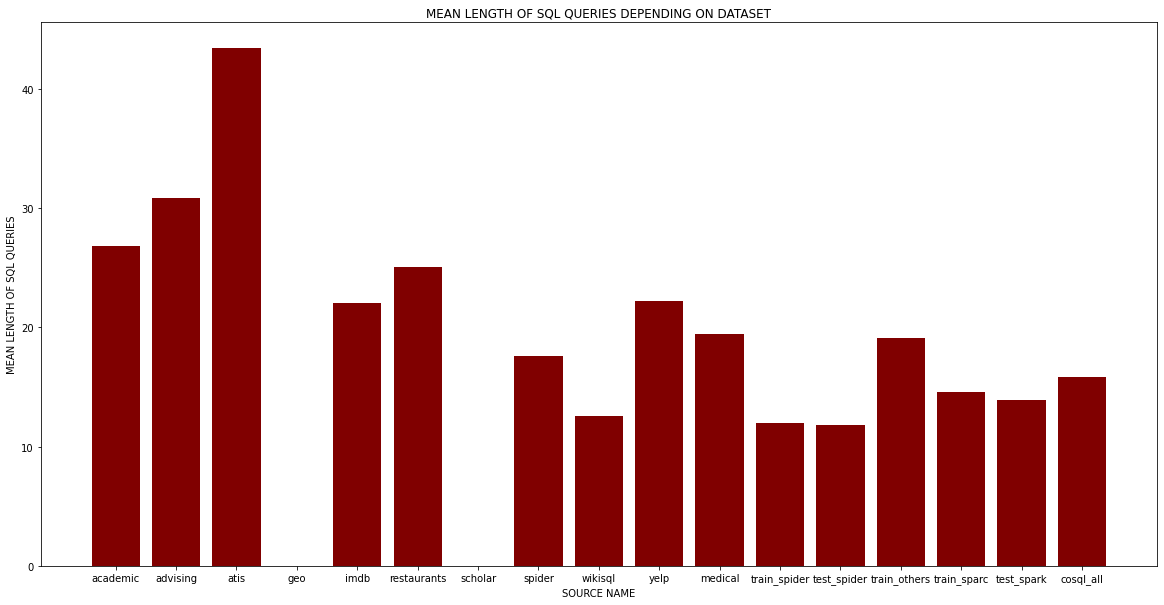

In [23]:
fig = plt.figure(figsize = (20, 10))
plt.bar(description_df['source'], description_df['mean_len_sql'], color ='maroon',
        width = 0.8)
plt.xlabel("SOURCE NAME")
plt.ylabel("MEAN LENGTH OF SQL QUERIES")
plt.title("MEAN LENGTH OF SQL QUERIES DEPENDING ON DATASET")
plt.show()

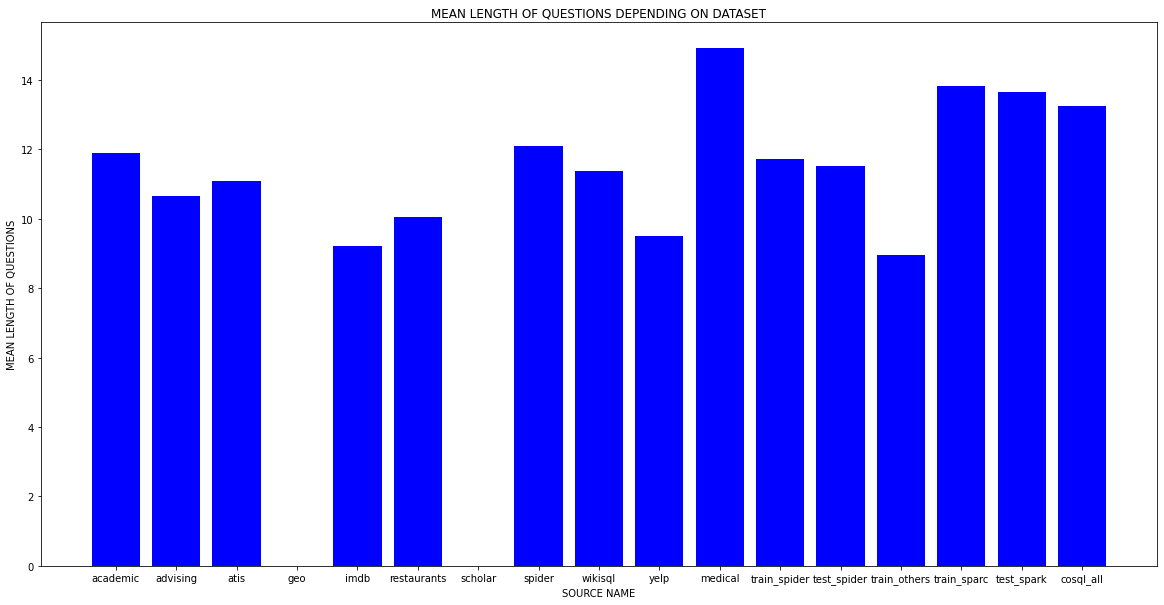

In [24]:
fig = plt.figure(figsize = (20, 10))
plt.bar(description_df['source'], description_df['mean_len_question'], color ='blue',
        width = 0.8)
plt.xlabel("SOURCE NAME")
plt.ylabel("MEAN LENGTH OF QUESTIONS")
plt.title("MEAN LENGTH OF QUESTIONS DEPENDING ON DATASET")
plt.show()

In [25]:
grouped = final_df.groupby('source').count()
grouped['sql']

source
academic          185
advising         4366
atis             3827
cosql_all           8
geography         607
imdb              125
medical         22512
restaurants       125
spider           9342
test_spark         20
test_spider      1019
train_others     1375
train_sparc        84
train_spider     6926
wikisql         75430
yelp              122
Name: sql, dtype: int64

In [26]:
final_df.isna().sum()

question                 0
source                   0
sql                      0
SELECT                   0
WHERE                    0
FROM                     0
JOIN                     0
HAVING                   0
LIKE                     0
GROUP BY                 0
COUNT                    0
DISTINCT                 0
MIN                      0
MAX                      0
AVG                      0
ORDER BY                 0
DATE                     0
sqlSplit                 0
questionSplit            0
questionUniqueCounter    0
sqlUniqueCounter         0
dtype: int64

In [27]:
data_keywords

,SELECT,WHERE,FROM,JOIN,HAVING,LIKE,GROUP BY,COUNT,DISTINCT,MIN,MAX,AVG,ORDER BY,DATE,source
0,193,182,193,0,18,0,38,85,79,0,0,0,22,0,academic
0,5264,5231,5264,3557,0,3172,92,954,3843,324,76,10,268,0,advising
0,5259,5232,9177,0,0,13,8,69,3832,437,118,0,0,9782,atis
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,geo
0,126,125,126,0,0,0,6,31,31,0,1,0,10,0,imdb
0,156,156,156,0,0,0,0,14,0,0,23,0,0,0,restaurants
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,scholar
0,10752,6046,10787,6592,544,275,2226,5966,1581,455,410,615,2026,772,spider
0,75448,74848,75789,144,3,0,0,9767,0,5597,4681,3321,0,8580,wikisql
0,122,122,122,0,1,4,8,58,39,0,0,4,8,0,yelp
